In [14]:
import pandas as pd 
import numpy as np
from scipy import stats as scipy
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.dates as mdates
from scipy.stats import norm
from nltk.stem.porter import *

In [15]:
rest_data = pd.read_csv(r'C:\Users\pauli\Downloads\rest_data_us.csv')

In [16]:
display(rest_data.head(), rest_data.info(), rest_data.describe(include='object'), rest_data.isnull().sum(), rest_data.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9651 entries, 0 to 9650
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           9651 non-null   int64 
 1   object_name  9651 non-null   object
 2   address      9651 non-null   object
 3   chain        9648 non-null   object
 4   object_type  9651 non-null   object
 5   number       9651 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 452.5+ KB


,id,object_name,address,chain,object_type,number
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,False,Cafe,26
1,11787,REILLY'S,100 WORLD WAY # 120,False,Restaurant,9
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD # 253,False,Fast Food,20
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22
4,11790,POLLEN,2100 ECHO PARK AVE,False,Restaurant,20


None

,object_name,address,chain,object_type
count,9651,9651,9648,9651
unique,8672,8517,2,6
top,THE COFFEE BEAN & TEA LEAF,3607 TROUSDALE PKWY,False,Restaurant
freq,47,11,5972,7255


id             0
object_name    0
address        0
chain          3
object_type    0
number         0
dtype: int64

0

In [17]:
display(rest_data[rest_data['chain'].isnull() == True])
display(rest_data['object_name'].value_counts())

,id,object_name,address,chain,object_type,number
7408,19194,TAQUERIA LOS 3 CARNALES,5000 E WHITTIER BLVD,NaN,Restaurant,14
7523,19309,JAMMIN JIMMY'S PIZZA,1641 FIRESTONE BLVD,NaN,Pizza,1
8648,20434,THE LEXINGTON THEATER,129 E 3RD ST,NaN,Restaurant,35


THE COFFEE BEAN & TEA LEAF    47
SUBWAY                        31
DOMINO'S PIZZA                15
KENTUCKY FRIED CHICKEN        14
WABA GRILL                    14
                              ..
III FORKS                      1
EL CHARRO                      1
LA LUZ DEL DIA                 1
TACO SHOP                      1
EL TREBOL                      1
Name: object_name, Length: 8672, dtype: int64

In [18]:
rest_data = rest_data.dropna()

In [19]:
#rest_data['chain'].replace({False: 0, True: 1}, inplace=True)
#display(rest_data)
#rest_data['chain'] = rest_data['chain'].astype(int)
#df = pd.DataFrame(rest_data,columns=['chain'])

#sns.barplot(data=rest_data, x='chain', y=)

In [20]:
rest_data["chain"] = rest_data["chain"].view('i1')

TypeError: Cannot change data-type for object array.

In [21]:
plt.bar(x=)

SyntaxError: invalid syntax (<ipython-input-21-ec3891b0911a>, line 1)

TypeError: '<' not supported between instances of 'str' and 'int'

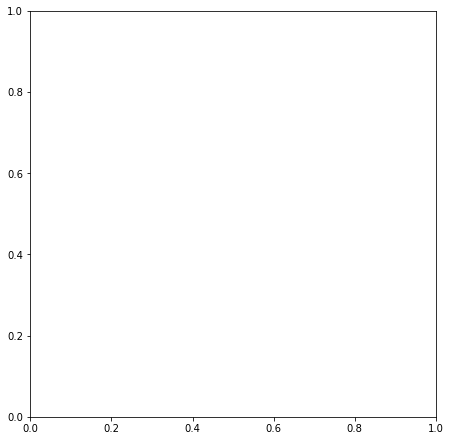

In [22]:


plt.figure(figsize=(16,8))
# plot chart
ax1 = plt.subplot(121, aspect='equal')
rest_data.plot(kind='pie', y = 'object_type', ax=ax1, autopct='%1.1f%%', 
 startangle=90, shadow=False, labels=rest_data['object_type'], legend = False, fontsize=14)

In [23]:
rest_data['pp'] = (rest_data['object_type'] == 'Cafe')

Text(0, 0.5, 'Proportions of chain/nochain')

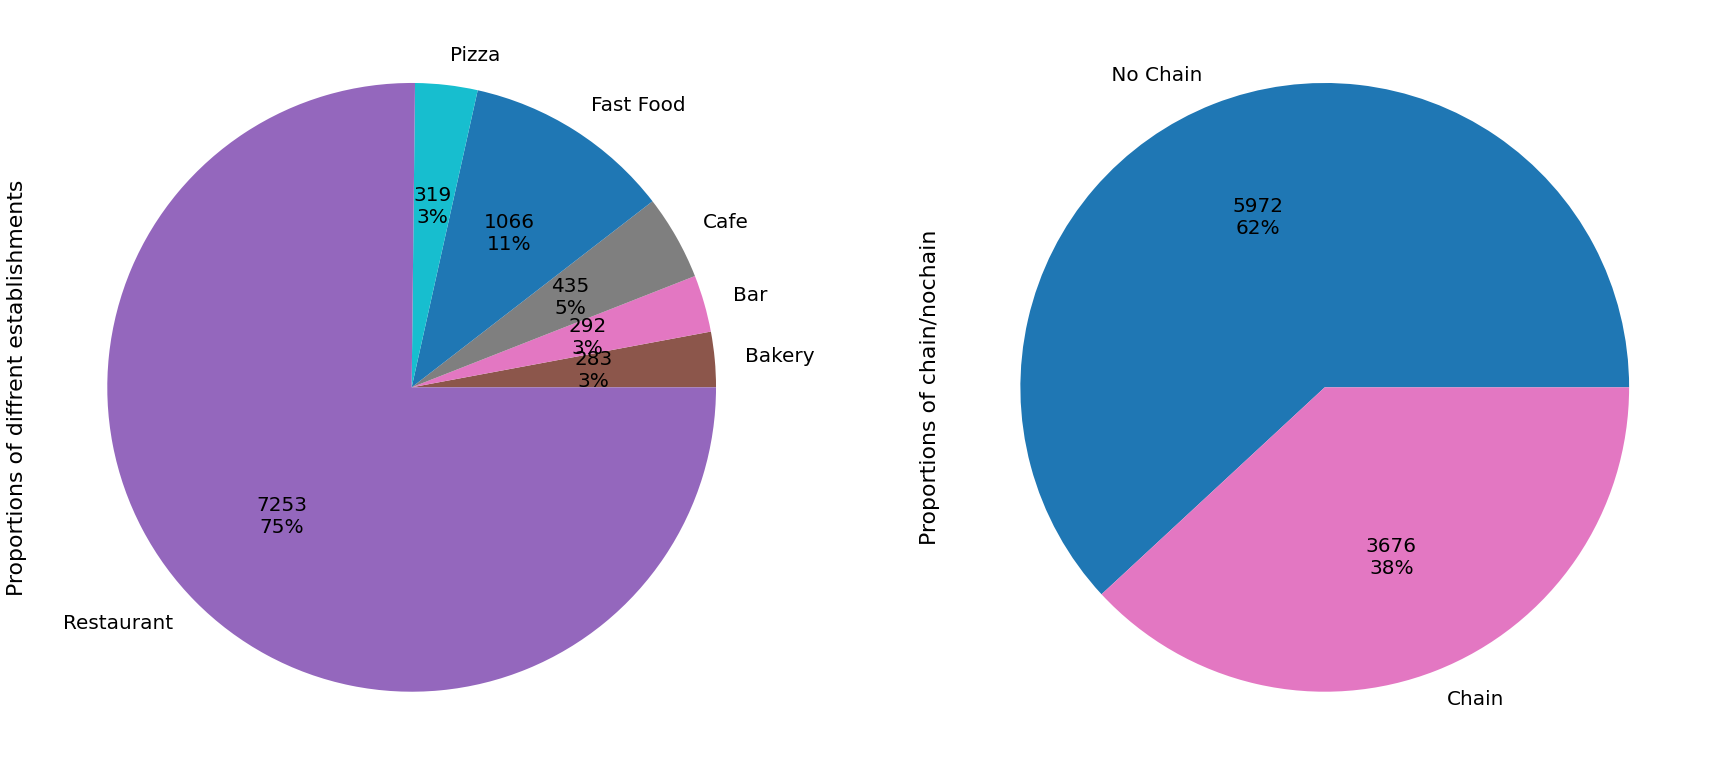

In [37]:
pie_labels = [' No Chain', 'Chain']
def label_function(val):
    return f'{val / 100 * len(rest_data):.0f}\n{val:.0f}%'
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(30, 30))
rest_data.groupby('object_type').size().plot(kind='pie', autopct=label_function, textprops={'fontsize': 20},
                                 # colors=['tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan', 'tab:purple'], ax=ax1)
                                colors=['tab:brown', 'tab:pink', 'tab:gray', 'tab:blue', 'tab:cyan', 'tab:purple'], ax=ax1)         
rest_data.groupby('chain').size().plot(kind='pie', autopct=label_function, textprops={'fontsize': 20},
                                  colors=['tab:blue', 'tab:pink', 'tab:gray'], labels=pie_labels, ax=ax2)
ax1.set_ylabel('Proportions of diffrent establishments', size=22)
ax2.set_ylabel('Proportions of chain/nochain', size=22)
#plt.show()

Text(0.5, 1.0, 'Establishment Type By chain/Not chain')

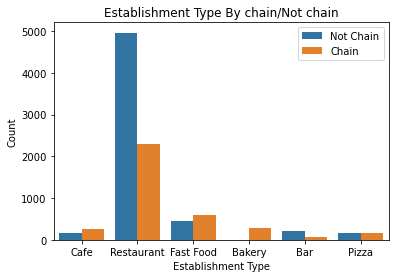

In [12]:
ax = sns.countplot(x="object_type", hue='chain',data=rest_data)
plt.legend(["Not Chain", "Chain"]);
plt.xlabel('Establishment Type')
plt.ylabel('Count')
plt.title('Establishment Type By chain/Not chain')

Text(0.5, 1.0, 'Mean number of seats for Establishment type')

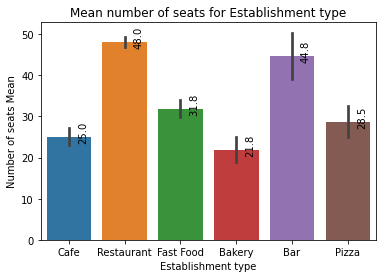

In [13]:
#display(rest_data['object_type'].unique())
#columns = ['Cafe', 'Restaurant', 'Fast Food', 'Bakery', 'Bar', 'Pizza']
#for columns in (rest_data['object_type']):
   # display(rest_data['number'].mean())
g = sns.barplot(data=rest_data, x='object_type', y='number')
for p in g.patches:
    g.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'left', va = 'center', color='black',rotation=90, 
                   xytext = (9, 5), 
                   textcoords = 'offset points')
plt.ylabel('Number of seats Mean')
plt.xlabel('Establishment type')
plt.title('Mean number of seats for Establishment type')



Text(0.5, 1.0, 'Chain resturants seat number distrubution')

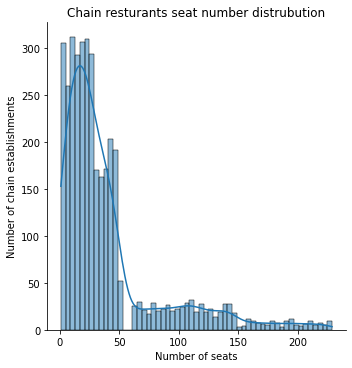

In [38]:
chain_data = rest_data.query('chain == True')
tx = sns.displot(chain_data, x="number", kde=True)
plt.xlabel('Number of seats')
plt.ylabel('Number of chain establishments')
plt.title('Chain resturants seat number distrubution')


In [ ]:
rest_data['street'] = filter(str.isalpha, rest_data['address'])


display(rest_data)

In [ ]:

rest_data['address_letters'] = rest_data['address'].replace('(\d)', '', regex=True)
rest_data['address_letters'] = rest_data['address_letters'].replace('(\W)', '',regex=True)
rest_data['address_letters'] = rest_data['address_letters'].str.lower()
display(rest_data['address_letters'].value_counts()[:10])
display(rest_data)

In [ ]:
labels = ['Wth ST', 'W Sunsett BLVD', 'WPico BLVD', 'Wilshire BLVD', 'Hollywood BLVD', 'S Western AVE', 'Santa Monica BLVD','W RD ST','S Figueroa ST', 'S Vermont AVE']
ax = rest_data['address_letters'].value_counts()[:10].plot(kind='barh')
ax.set_yticklabels(labels)
plt.xlabel('Restaruants Count')
plt.ylabel('Street Name')
plt.title('Top 10 Streets by Restaurants')

In [ ]:
count_freq = dict(rest_data['address_letters'].value_counts())
rest_data['count_freq'] = rest_data['address_letters']
rest_data['count_freq'] = rest_data['count_freq'].map(count_freq)

number_streets = rest_data.pivot_table(index='address_letters', values='count_freq', aggfunc='sum').reset_index()
display(number_streets.sort_values(by='count_freq', ascending=False).head(50))
streets_one = number_streets.query('count_freq == 1')
display(rest_data[rest_data['count_freq'] < 2])
rest_data['count_freq'].hist()

In [ ]:
display(len(rest_data['address_letters'].unique()))

In [ ]:
ax = rest_data['address_letters'].value_counts()[:30].plot(kind='barh')
ax.set_yticklabels(labels)
plt.xlabel('Restaruants Count')
plt.ylabel('Street Name')
plt.title('Top 10 Streets by Restaurants')